In [6]:
import os
import platform
from IPython.display import clear_output
print(platform.platform())

def resolve_dir(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)

def reset_path(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)
    else:
        os.system('rm -f {}/*'.format( Dir))

Windows-10-10.0.26100-SP0


In [7]:
!pip install --upgrade tensorflow


^C


In [4]:

!pip install --upgrade protobuf


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\laksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
!pip install protobuf==3.19.0

   ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
   -- ------------------------------------- 10.2/162.6 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/162.6 kB 217.9 kB/s eta 0:00:01
   ------------ -------------------------- 51.2/162.6 kB 372.4 kB/s eta 0:00:01
   ---------------------------- --------- 122.9/162.6 kB 717.5 kB/s eta 0:00:01
   -------------------------------------- 162.6/162.6 kB 810.6 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.18.0 requires protobuf!=4.24.0,>=3.19.6, but you have protobuf 3.19.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\laksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'


In [9]:
import tensorflow as tf
tf.random.set_seed(73)

In [10]:
print("Tensorflow version " + tf.__version__)


Tensorflow version 2.18.0


In [11]:
MyDrive = '/kaggle/working'
PROJECT_DIR = './archive'

In [12]:
import os
os.listdir(PROJECT_DIR)

['Dataset', 'Real Life Violence Dataset', 'real life violence situations']

In [9]:
pip install imgaug

   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 948.0/948.0 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.8 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.8 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.9/12.8 MB 3.8 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.8 MB 3.5 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.8 MB 3.2 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.8 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.8 MB 3.4 MB/s eta 0:00:03
   --------------------- ------------------ 6.8/12.8 MB 3.5 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.8 MB 3.5 MB/s eta 0:00:02
   ------

In [10]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
import os
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

IMG_SIZE = 128
ColorChannels = 3

def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)
    
    import math
    rate = math.floor(vidcap.get(3))
    count = 0
    
    ImageFrames = []
    while vidcap.isOpened():
        ID = vidcap.get(1)
        success, image = vidcap.read()
        
        if success:
            # skipping frames to avoid duplications 
            if (ID % 7 == 0):
                flip = iaa.Fliplr(1.0)
                zoom = iaa.Affine(scale=1.3)
                random_brightness = iaa.Multiply((1, 1.3))
                rotate = iaa.Affine(rotate=(-25, 25))
                
                image_aug = flip(image = image)
                image_aug = random_brightness(image = image_aug)
                image_aug = zoom(image = image_aug)
                image_aug = rotate(image = image_aug)
                
                rgb_img = cv2.cvtColor(image_aug, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(rgb_img, (IMG_SIZE, IMG_SIZE))
                ImageFrames.append(resized)
                
            count += 1
        else:
            break
    
    vidcap.release()
    
    return ImageFrames

In [14]:
import os

# Define the base project directory
PROJECT_DIR = r"C:\Users\laksh\projects\jujubi\archive" 

In [15]:
%%time
from tqdm import tqdm

VideoDataDir = PROJECT_DIR + '/Dataset'
print('we have \n{} Violence videos \n{} NonViolence videos'.format(
              len(os.listdir(VideoDataDir + '/Violence')), 
              len(os.listdir(VideoDataDir + '/NonViolence'))))

X_original = []
y_original = []

print('i choose 600 videos out of 1200, cuz of memory issue')
CLASSES = ["NonViolence", "Violence"]
#600 <- 300 + 300

we have 
497 Violence videos 
528 NonViolence videos
i choose 600 videos out of 1200, cuz of memory issue
CPU times: total: 15.6 ms
Wall time: 32.7 ms


In [17]:
for category in os.listdir(VideoDataDir):
    path = os.path.join(VideoDataDir, category)
    class_num = CLASSES.index(category)
    for i, video in enumerate(tqdm(os.listdir(path)[0:350])):
        frames = video_to_frames(path + '/' + video)
        for j, frame in enumerate(frames):
            X_original.append(frame)
            y_original.append(class_num)

100%|██████████| 350/350 [01:45<00:00,  3.32it/s]


In [18]:
import numpy as np
X_original = np.array(X_original).reshape(-1 , IMG_SIZE * IMG_SIZE * 3)
y_original = np.array(y_original)
len(X_original)

15889

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_sample = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=73)

for train_index, test_index in stratified_sample.split(X_original, y_original):
    X_train, X_test = X_original[train_index], X_original[test_index]
    y_train, y_test = y_original[train_index], y_original[test_index]

X_train_nn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255
X_test_nn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255

In [20]:
import cv2
import os
import numpy as np
import pickle
import matplotlib
matplotlib.use("Agg")

from keras.layers import Input
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense

import matplotlib.pyplot as plt

In [24]:
epochs = 30
from keras import regularizers
from keras.applications import MobileNetV2  # Import MobileNetV2
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

kernel_regularizer = regularizers.l2(0.0001)

# Check if TPU is available (Optional, only needed if using TPU)
TPU_INIT = False
try:
    # For Google Colab (Optional, detect TPU availability)
    tpu_devices = tf.config.experimental.list_physical_devices('TPU')
    if tpu_devices:
        tpu_strategy = tf.distribute.TPUStrategy(tpu_devices[0])
        TPU_INIT = True
except:
    TPU_INIT = False

def load_layers():
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    baseModel = MobileNetV2(pooling='avg',
                             include_top=False, 
                             input_tensor=input_tensor)

    headModel = baseModel.output   
    headModel = Dense(1, activation="sigmoid")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)

    # Freeze base model layers
    for layer in baseModel.layers:
        layer.trainable = False

    print("Compiling model...")
    model.compile(loss="binary_crossentropy",
                  optimizer='adam',
                  metrics=["accuracy"])

    return model

if TPU_INIT:
    with tpu_strategy.scope():
        model = load_layers()
else:
    model = load_layers()

model.summary()  # Display the model summary


C:\Users\laksh\AppData\Local\Temp\ipykernel_7804\1934079316.py:23: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(pooling='avg',


Compiling model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

patience = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005

batch_size = 4

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True

In [26]:
MyDrive = r"C:\Users\laksh\projects\jujubi"

In [27]:
end_callback = myCallback()

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

early_stopping = EarlyStopping(patience = patience, monitor='val_loss',
                                 mode='min', restore_best_weights=True, 
                                 verbose = 1, min_delta = .00075)

PROJECT_DIR = MyDrive + '/RiskDetection'

lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

os.system('rm -rf ./logs/')

import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, write_graph=True, histogram_freq=1)

checkpoint_filepath = 'ModelWeights.weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)


callbacks = [end_callback, lr_callback, model_checkpoints, tensorboard_callback, early_stopping, lr_plat]

if TPU_INIT:
    callbacks = [end_callback, lr_callback, model_checkpoints, early_stopping, lr_plat]

In [28]:
print('Training head...')
#model.load_weights('./Model_Weights.h5')

history = model.fit(X_train_nn ,y_train, epochs=epochs,
                        callbacks=callbacks,
                        validation_data = (X_test_nn, y_test),
                        batch_size=batch_size)

print('\nRestoring best Weights for MobileNetV2')
model.load_weights(checkpoint_filepath)

Training head...
Epoch 1/30


C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_3']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


2781/2781 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5527 - loss: 0.8044
Epoch 1: val_loss improved from inf to 0.64690, saving model to ModelWeights.weights.h5
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 152s 50ms/step - accuracy: 0.5527 - loss: 0.8044 - val_accuracy: 0.6455 - val_loss: 0.6469 - learning_rate: 1.0000e-05
Epoch 2/30
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6664 - loss: 0.6208
Epoch 2: val_loss improved from 0.64690 to 0.51833, saving model to ModelWeights.weights.h5
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 125s 45ms/step - accuracy: 0.6664 - loss: 0.6207 - val_accuracy: 0.7520 - val_loss: 0.5183 - learning_rate: 1.8000e-05
Epoch 3/30
2780/2781 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7496 - loss: 0.5055
Epoch 3: val_loss improved from 0.51833 to 0.44045, saving model to ModelWeights.weights.h5
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 123s 44ms/step - accuracy: 0.7496 - loss: 0.5055 - val_accuracy: 0.7942 - val_loss: 0.4405 - learning_rate: 2.6000e-05
Epoch 4/30
2781/2781 ━

In [29]:
%matplotlib inline

def print_graph(item, index, history):
    plt.figure()
    train_values = history.history[item][0:index]
    plt.plot(train_values)
    test_values = history.history['val_' + item][0:index]
    plt.plot(test_values)
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()
    plot = '{}.png'.format(item)
    plt.savefig(plot)


def get_best_epoch(test_loss, history):
    for key, item in enumerate(history.history.items()):
        (name, arr) = item
        if name == 'val_loss':
            for i in range(len(arr)):
                if round(test_loss, 2) == round(arr[i], 2):
                    return i
                
def model_summary(model, history):
    print('---'*30)
    test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)

    if history:
        index = get_best_epoch(test_loss, history)
        print('Best Epochs: ', index)

        train_accuracy = history.history['accuracy'][index]
        train_loss = history.history['loss'][index]

        print('Accuracy on train:',train_accuracy,'\tLoss on train:',train_loss)
        print('Accuracy on test:',test_accuracy,'\tLoss on test:',test_loss)
        print_graph('loss', index, history)
        print_graph('accuracy', index, history)
        print('---'*30)                

------------------------------------------------------------------------------------------
Best Epochs:  29
Accuracy on train: 0.9072109460830688 	Loss on train: 0.2324020266532898
Accuracy on test: 0.8997272849082947 	Loss on test: 0.2549026310443878


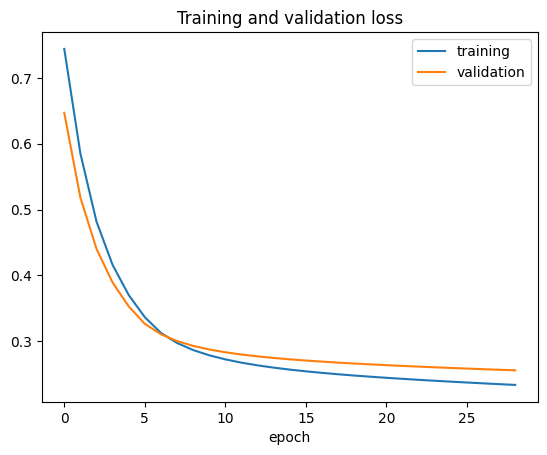

<Figure size 640x480 with 0 Axes>

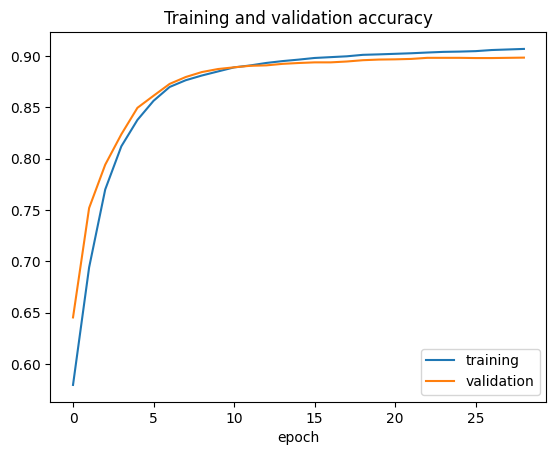

------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [30]:
model_summary(model, history)

In [31]:
# evaluate the network
print("Evaluating network...")
predictions = model.predict(X_test_nn)
preds = predictions > 0.5

Evaluating network...


C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_3']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


149/149 ━━━━━━━━━━━━━━━━━━━━ 47s 298ms/step


In [34]:
pip install scikit-learn==1.1.3


  You can safely remove it manually.



   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.5 MB 7.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.5 MB 3.4 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.5 MB 3.8 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.5 MB 3.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.7/7.5 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.2/7.5 MB 3.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.2/7.5 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.0/7.5 MB 3.7 MB/s eta 0:00:01
   ------------------------------------ --- 6.8/7.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-

In [36]:
import sklearn
print(sklearn.__version__)

1.6.1


> Correct Predictions: 4289
> Wrong Predictions: 478


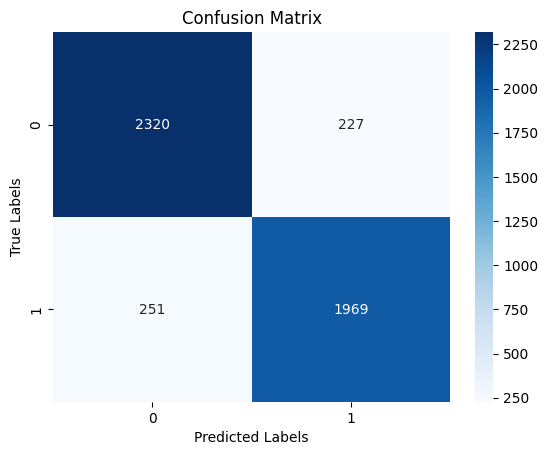

              precision    recall  f1-score   support

 NonViolence       0.90      0.91      0.91      2547
    Violence       0.90      0.89      0.89      2220

    accuracy                           0.90      4767
   macro avg       0.90      0.90      0.90      4767
weighted avg       0.90      0.90      0.90      4767



In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Compute confusion matrix
corr_pred = metrics.confusion_matrix(y_test, preds)

# Correct and wrong predictions
n_correct = np.int32((corr_pred[0][0] + corr_pred[1][1]))
print('> Correct Predictions:', n_correct)
n_wrongs = np.int32((corr_pred[0][1] + corr_pred[1][0]))
print('> Wrong Predictions:', n_wrongs)

# Plot heatmap
sns.heatmap(corr_pred, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(metrics.classification_report(y_test, preds, target_names=["NonViolence", "Violence"]))


In [38]:
args_model = "modelnew.h5"
model.save(args_model)